In [38]:
import pandas as pd
import seaborn as sns

In [39]:
df = pd.read_csv('/Users/jason/Desktop/CCT/Data Prep/CA1_Materials/student_data (1).csv')

File size is 533,190 bytes (537 KB on disk) which means....

In [40]:
pd.set_option('display.max_columns', None)

I prefer this as it allows me to get a better impression of the Dataset

In [41]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171.0,1,1,122.0,1,19,12.0,5,9,127.3,1,0,0.0,1,1,0,20,0.0,0,0,0,0,0.000000,0,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254.0,1,1,160.0,1,1,3.0,3,3,142.5,1,0,0.0,0,1,0,19,0.0,0,6,6,6,14.000000,0,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070.0,1,1,122.0,1,37,37.0,9,9,124.8,1,0,0.0,0,1,0,19,0.0,0,6,0,0,0.000000,0,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773.0,1,1,122.0,1,38,37.0,5,3,119.6,1,0,0.0,1,0,0,20,0.0,0,6,8,6,13.428571,0,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014.0,0,1,100.0,1,37,38.0,9,9,141.5,0,0,0.0,1,0,0,45,0.0,0,6,9,5,12.333333,0,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773.0,1,1,125.0,1,1,1.0,5,4,122.2,0,0,0.0,1,1,0,19,0.0,0,6,7,5,13.600000,0,0,6.0,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773.0,1,1,120.0,105,1,1.0,9,9,119.0,1,0,1.0,0,0,0,18,1.0,0,6,6,6,12.000000,0,0,6.0,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500.0,1,1,154.0,1,37,37.0,9,9,149.5,1,0,0.0,1,0,1,30,0.0,0,7,8,7,14.912500,0,0,8.0,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147.0,1,1,180.0,1,37,37.0,7,4,153.8,1,0,0.0,1,0,1,20,0.0,0,5,5,5,13.800000,0,0,5.0,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Now that is done, I am going to do some simple renaming

In [42]:
df.rename(columns={
    'Marital status': 'marital_status',
    'Application mode': 'application_mode',
    'Application order': 'application_order',
    'Course': 'course',
    'Daytime/evening attendance': 'attendance_type',
    'Previous qualification': 'prev_qualification',
    'Previous qualification (grade)': 'prev_qualification_grade',
    'Nacionality': 'nationality', 
    'Mother\'s qualification': 'mother_qualification', 
    'Father\'s qualification': 'father_qualification',
    'Mother\'s occupation': 'mother_occupation',
    'Father\'s occupation': 'father_occupation',
    'Admission grade': 'admission_grade',
    'Displaced': 'displaced',
    'Educational special needs': 'special_needs',
    'Debtor': 'debtor',
    'Tuition fees up to date': 'fees_up_to_date',
    'Gender': 'gender',
    'Scholarship holder': 'scholarship_holder',
    'Age at enrollment': 'age_at_enrollment',
    'International': 'international',
    'Curricular units 1st sem (credited)': 'cu_1st_sem_credited',
    'Curricular units 1st sem (enrolled)': 'cu_1st_sem_enrolled',
    'Curricular units 1st sem (evaluations)': 'cu_1st_sem_evaluations',
    'Curricular units 1st sem (approved)': 'cu_1st_sem_approved',
    'Curricular units 1st sem (grade)': 'cu_1st_sem_grade',
    'Curricular units 1st sem (without evaluations)': 'cu_1st_sem_no_evals',
    'Curricular units 2nd sem (credited)': 'cu_2nd_sem_credited',
    'Curricular units 2nd sem (enrolled)': 'cu_2nd_sem_enrolled',
    'Curricular units 2nd sem (evaluations)': 'cu_2nd_sem_evaluations',
    'Curricular units 2nd sem (approved)': 'cu_2nd_sem_approved',
    'Curricular units 2nd sem (grade)': 'cu_2nd_sem_grade',
    'Curricular units 2nd sem (without evaluations)': 'cu_2nd_sem_no_evals',
    'Unemployment rate': 'unemployment_rate',
    'Inflation rate': 'inflation_rate',
    'GDP': 'gdp',
    'Target': 'target'
    
}, inplace=True)

I can see now that there are 37 features, which should indicate an overall richer description. 
I can also see that with 4424 observations, I can train my model better but computational power should be considered.

In [43]:
df.isnull().sum()

marital_status              0
application_mode            0
application_order           0
course                      1
attendance_type             0
prev_qualification          0
prev_qualification_grade    0
nationality                 0
mother_qualification        0
father_qualification        1
mother_occupation           0
father_occupation           0
admission_grade             1
displaced                   0
special_needs               0
debtor                      1
fees_up_to_date             1
gender                      0
scholarship_holder          0
age_at_enrollment           0
international               1
cu_1st_sem_credited         0
cu_1st_sem_enrolled         0
cu_1st_sem_evaluations      0
cu_1st_sem_approved         0
cu_1st_sem_grade            1
cu_1st_sem_no_evals         0
cu_2nd_sem_credited         0
cu_2nd_sem_enrolled         1
cu_2nd_sem_evaluations      0
cu_2nd_sem_approved         0
cu_2nd_sem_grade            1
cu_2nd_sem_no_evals         0
unemployme

With so few null values, I will choose to drop rather than impute. Then check. 
Also a good to double check my renaming.

In [44]:
df.dropna(axis=0,inplace=True)

how = 'any'
how = 'all' 

print(df.isnull().sum())

marital_status              0
application_mode            0
application_order           0
course                      0
attendance_type             0
prev_qualification          0
prev_qualification_grade    0
nationality                 0
mother_qualification        0
father_qualification        0
mother_occupation           0
father_occupation           0
admission_grade             0
displaced                   0
special_needs               0
debtor                      0
fees_up_to_date             0
gender                      0
scholarship_holder          0
age_at_enrollment           0
international               0
cu_1st_sem_credited         0
cu_1st_sem_enrolled         0
cu_1st_sem_evaluations      0
cu_1st_sem_approved         0
cu_1st_sem_grade            0
cu_1st_sem_no_evals         0
cu_2nd_sem_credited         0
cu_2nd_sem_enrolled         0
cu_2nd_sem_evaluations      0
cu_2nd_sem_approved         0
cu_2nd_sem_grade            0
cu_2nd_sem_no_evals         0
unemployme

In [45]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 37)


I see there are no duplicates

In [46]:
df.dtypes

marital_status               object
application_mode              int64
application_order             int64
course                      float64
attendance_type               int64
prev_qualification            int64
prev_qualification_grade    float64
nationality                   int64
mother_qualification          int64
father_qualification        float64
mother_occupation             int64
father_occupation             int64
admission_grade             float64
displaced                    object
special_needs                 int64
debtor                      float64
fees_up_to_date              object
gender                        int64
scholarship_holder            int64
age_at_enrollment            object
international               float64
cu_1st_sem_credited          object
cu_1st_sem_enrolled           int64
cu_1st_sem_evaluations        int64
cu_1st_sem_approved           int64
cu_1st_sem_grade            float64
cu_1st_sem_no_evals           int64
cu_2nd_sem_credited         

I see there are errors in:
    ['Displaced']
    ['Tuition fees up to date']
    ['Age at enrollment']
    ['Curricular units 1st sem (credited)']
    ['Marital Status']
So I am going to investigate each feature further.

In [47]:
unique_values = df['displaced'].unique()
print(unique_values)

['1' '0']


I see there's no mistakes so I will just convert the str to numeric

In [48]:
df['displaced'] = df['displaced'].astype(int)

In [49]:
unique_values = df['fees_up_to_date'].unique()
print(unique_values)

['1' '0' '?']


I see the problem is the ?, so I just need to see how often it's present.

In [50]:
question_mark_counts = df['fees_up_to_date'].value_counts()
print(question_mark_counts)

fees_up_to_date
1    3888
0     526
?       1
Name: count, dtype: int64


As there is only one occurence of it I will just replace it with NaN using numpy and then drop row for future modelling purposes

In [51]:
import numpy as np
df['fees_up_to_date'] = pd.to_numeric(df['fees_up_to_date'], errors='coerce')
df = df.dropna(subset=['fees_up_to_date'])

In [52]:
unique_values = df['age_at_enrollment'].unique()
print(unique_values)

['20' '19' '45' '50' '18' '22' '21' '34' '37' '43' '55' '39' '29' '24'
 '27' '23' '26' '33' '35' '25' '44' '36' '47' '28' '38' 'UnKnown' '30'
 '31' '32' '40' '42' '48' '49' '46' '41' '70' '60' '53' '51' '52' '54'
 '61' '58' '59' '17' '57' '62']


In [53]:
UnKnown = df['age_at_enrollment'].value_counts()
print(UnKnown)

age_at_enrollment
18         1035
19          909
20          597
21          319
22          174
24          131
23          108
26           94
25           93
27           91
28           83
29           66
32           61
34           59
31           55
35           49
30           48
33           45
37           41
39           38
36           35
41           31
38           29
43           25
40           23
45           22
44           21
47           18
50           16
42           13
49           13
46           12
48           11
54            7
53            7
51            7
55            5
17            5
52            4
58            3
59            3
57            2
60            2
UnKnown       1
61            1
70            1
62            1
Name: count, dtype: int64


As there is only 1 occurence I will again replace it with NaN and drop

In [58]:
df['age_at_enrollment'] = pd.to_numeric(df['age_at_enrollment'], errors='coerce')
df = df.dropna(subset=['age_at_enrollment'])

In [59]:
unique_values = df['cu_1st_sem_credited'].unique()
print(unique_values)

[ 0.  2.  3.  6.  7. 13.  4.  1.  5. 19. 11.  8. 10.  9. 15. 12. 14. 18.
 17. 16. 20. nan]


In [60]:
Na = df['cu_1st_sem_credited'].value_counts()
print (Na)

cu_1st_sem_credited
0.0     3838
2.0       94
1.0       85
3.0       68
6.0       50
4.0       47
7.0       41
5.0       40
8.0       31
9.0       27
11.0      17
10.0      15
14.0      15
13.0      13
12.0      12
15.0       5
18.0       4
17.0       3
16.0       3
19.0       2
20.0       2
Name: count, dtype: int64


Same thing again, as it's only one occurencce just gonna swap it with NaN

In [61]:
df['cu_1st_sem_credited'] = pd.to_numeric(df['cu_1st_sem_credited'], errors='coerce')

In [62]:
unique_values = df['marital_status'].unique()
print(unique_values)

['1' '2' '4' '?' '3' '5' '6']


In [63]:
q_mark = df['marital_status'].value_counts()
print (q_mark)

marital_status
1    3909
2     377
4      91
5      25
6       6
3       4
?       1
Name: count, dtype: int64


Exact same as before, 1 occurence so swap to NaN and drop

In [64]:
df['marital_status'] = pd.to_numeric(df['marital_status'], errors='coerce')
df = df.dropna(subset=['marital_status'])

In [65]:
df['cu_1st_sem_credited'] = pd.to_numeric(df['cu_1st_sem_credited'], errors='coerce')
df = df.dropna(subset=['cu_1st_sem_credited'])

Now Let's double check and make sure everything worked

In [66]:
df.dtypes

marital_status              float64
application_mode              int64
application_order             int64
course                      float64
attendance_type               int64
prev_qualification            int64
prev_qualification_grade    float64
nationality                   int64
mother_qualification          int64
father_qualification        float64
mother_occupation             int64
father_occupation             int64
admission_grade             float64
displaced                     int64
special_needs                 int64
debtor                      float64
fees_up_to_date             float64
gender                        int64
scholarship_holder            int64
age_at_enrollment           float64
international               float64
cu_1st_sem_credited         float64
cu_1st_sem_enrolled           int64
cu_1st_sem_evaluations        int64
cu_1st_sem_approved           int64
cu_1st_sem_grade            float64
cu_1st_sem_no_evals           int64
cu_2nd_sem_credited         

In [95]:
df.isna().sum()

marital_status              0
application_mode            0
application_order           0
course                      0
attendance_type             0
prev_qualification          0
prev_qualification_grade    0
nationality                 0
mother_qualification        0
father_qualification        0
mother_occupation           0
father_occupation           0
admission_grade             0
displaced                   0
special_needs               0
debtor                      0
fees_up_to_date             0
gender                      0
scholarship_holder          0
age_at_enrollment           0
international               0
cu_1st_sem_credited         0
cu_1st_sem_enrolled         0
cu_1st_sem_evaluations      0
cu_1st_sem_approved         0
cu_1st_sem_grade            0
cu_1st_sem_no_evals         0
cu_2nd_sem_credited         0
cu_2nd_sem_enrolled         0
cu_2nd_sem_evaluations      0
cu_2nd_sem_approved         0
cu_2nd_sem_grade            0
cu_2nd_sem_no_evals         0
unemployme

In [96]:
df['marital_status'].dropna()

0       1.0
1       1.0
2       1.0
3       1.0
4       2.0
       ... 
4419    1.0
4420    1.0
4421    1.0
4422    1.0
4423    1.0
Name: marital_status, Length: 4411, dtype: float64

In [97]:
df['cu_1st_sem_credited'].unique()

array([ 0.,  2.,  3.,  6.,  7., 13.,  4.,  1.,  5., 19., 11.,  8., 10.,
        9., 15., 12., 14., 18., 17., 16., 20.])

Finally I am going to investigate the Target column and clean up any mistakes.

In [98]:
Unique_values = df['target'].unique()
print (Unique_values)

['Dropout' 'Graduate' 'Enrolled']


In [99]:
syntax = {
    'Drop': 'Dropout',
    'dropout': 'Dropout',
    'graduate': 'Graduate',
    'Grad': 'Graduate'}
df['target'] = df['target'].replace(syntax)

Now to just double check replacing the syntax error worked

In [100]:
df['target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [101]:
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA
import seaborn as sns; 
import matplotlib.pyplot as plt
sns.set() 

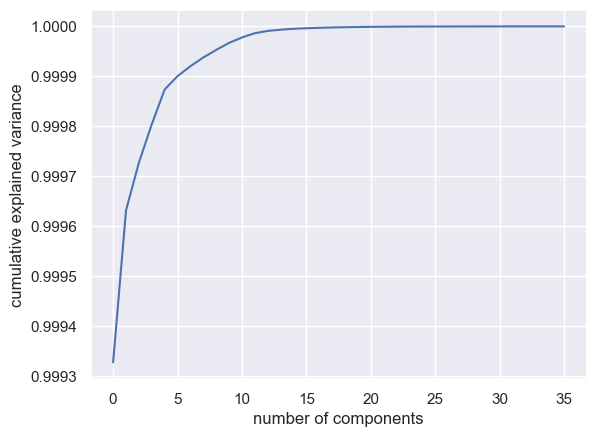

In [111]:
df_no_target = df.drop(columns=["target"])
pca = PCA().fit(df_no_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [202]:
pca = PCA(15)
projected = pca.fit_transform(df_no_label)

In [203]:
projected.shape

(4411, 15)

In [204]:
target_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3', 'C4','C5', 'C6', 'C7', 'C8','C9', 'C10', 'C11', 'C12','C13', 'C14', 'C15'])

In [205]:
target_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15
0,8690.618234,-0.922272,-1.156732,-6.148618,-15.234274,6.821512,3.413059,5.337476,-6.391775,-2.859778,-1.247631,-5.390655,-2.229611,0.547886,-0.946406
1,-392.352575,-13.792193,28.935399,22.581788,15.347688,1.456785,-12.066040,-1.440175,2.309746,-1.880907,-2.970336,-0.219032,-3.625523,1.365649,1.342257
2,-208.377218,-2.072389,-8.699952,-27.817669,8.340147,2.612732,4.301406,4.056984,-18.611866,2.556335,0.559512,-3.822841,4.736258,6.415485,-0.774189
3,-911.421657,-9.027342,-18.157498,-18.952023,1.357345,2.024945,3.204783,0.339997,2.764624,0.947694,-0.037455,-5.876638,-0.820115,-0.944101,0.044792
4,847.564697,-0.149329,-36.373231,-0.441910,-7.446410,3.666817,22.203476,28.043036,4.137535,2.053103,0.597940,7.166030,-7.767607,-0.619513,2.303893


In [206]:
target_pca["target"] = df["target"]

In [207]:
target_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,target
0,8690.618234,-0.922272,-1.156732,-6.148618,-15.234274,6.821512,3.413059,5.337476,-6.391775,-2.859778,-1.247631,-5.390655,-2.229611,0.547886,-0.946406,Dropout
1,-392.352575,-13.792193,28.935399,22.581788,15.347688,1.456785,-12.066040,-1.440175,2.309746,-1.880907,-2.970336,-0.219032,-3.625523,1.365649,1.342257,Graduate
2,-208.377218,-2.072389,-8.699952,-27.817669,8.340147,2.612732,4.301406,4.056984,-18.611866,2.556335,0.559512,-3.822841,4.736258,6.415485,-0.774189,Dropout
3,-911.421657,-9.027342,-18.157498,-18.952023,1.357345,2.024945,3.204783,0.339997,2.764624,0.947694,-0.037455,-5.876638,-0.820115,-0.944101,0.044792,Graduate
4,847.564697,-0.149329,-36.373231,-0.441910,-7.446410,3.666817,22.203476,28.043036,4.137535,2.053103,0.597940,7.166030,-7.767607,-0.619513,2.303893,Graduate


In [208]:
targeted_pca = target_pca.dropna()

In [209]:
target_array = targeted_pca.values

In [252]:
from sklearn.model_selection import train_test_split
X = target_array[:,0:15]
y = target_array[:,15]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

In [253]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [254]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [255]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.495573 (0.006465)
LDA: 0.495573 (0.005188)
KNN: 0.418280 (0.019118)
CART: 0.388136 (0.016967)
NB: 0.471401 (0.014992)
SVM: 0.498444 (0.003122)


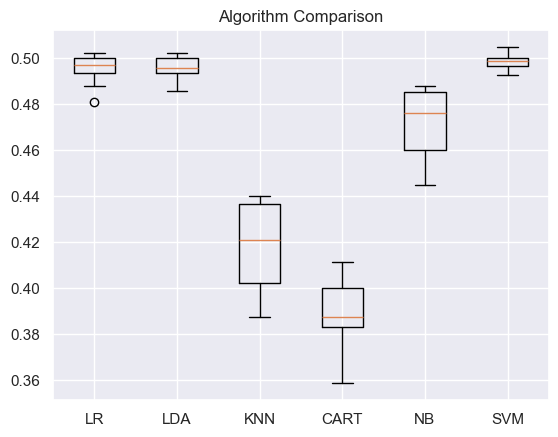

In [256]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [257]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [258]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.4818181818181818
[[  2   0  70]
 [  1   0  39]
 [  4   0 104]]
